# Visualizing the History of Nobel Prize Winners

## Project Description
The Nobel Prize is awarded yearly to scientists and scholars in chemistry, literature, physics, medicine, economics, and peace, with the first prize awarded in 1901. Are there any biases in the way the honors are awarded? Use your data manipulation and visualization skills to explore the history of this coveted prize.

## Project Instructions

Analyze Nobel Prize winner data and identify patterns by answering the following questions:

What is the most commonly awarded gender and birth country?

* Store your answers as string variables ``top_gender`` and ``top_country``.

  
Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?

* Store this as an integer called ``max_decade_usa``.

  
Which decade and Nobel Prize category combination had the highest proportion of female laureates?

* Store this as a dictionary called ``max_female_dict`` where the decade is the key and the category is the value. There should only be one key:value pair.

Who was the first woman to receive a Nobel Prize, and in what category?

* Save your string answers as ``first_woman_name`` and ``first_woman_category``.


Which individuals or organizations have won more than one Nobel Prize throughout the years?

* Store the full names in a list named ``repeat_list``.

## The Nobel Prize

The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [1]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


# Data Understanding and Preparing 

In [2]:
df=pd.read_csv('nobel.csv', 
            index_col=None, 
            header='infer')

df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [3]:
df.describe(include='all')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
count,1000.000000,1000,1000,912,1000,1000.000000,1000,1000,968,964,969,970,736,735,735,596,579,585
unique,NaN,6,621,615,4,NaN,2,993,949,649,129,2,325,195,29,585,293,50
top,NaN,Medicine,The Nobel Prize in Chemistry 1972,"""for their studies of extremely fast chemical ...",1/1,NaN,Individual,Comité international de la Croix Rouge (Intern...,1932-10-24,"New York, NY",United States of America,Male,University of California,"Cambridge, MA",United States of America,2013-11-19,Paris,United States of America
freq,NaN,227,3,3,358,NaN,966,3,2,55,291,905,36,53,385,2,27,206
mean,1973.721000,NaN,NaN,NaN,NaN,509.099000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,34.523195,NaN,NaN,NaN,NaN,298.130617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1901.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1949.750000,NaN,NaN,NaN,NaN,250.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1979.000000,NaN,NaN,NaN,NaN,500.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2003.000000,NaN,NaN,NaN,NaN,764.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  1000 non-null   int64 
 1   category              1000 non-null   object
 2   prize                 1000 non-null   object
 3   motivation            912 non-null    object
 4   prize_share           1000 non-null   object
 5   laureate_id           1000 non-null   int64 
 6   laureate_type         1000 non-null   object
 7   full_name             1000 non-null   object
 8   birth_date            968 non-null    object
 9   birth_city            964 non-null    object
 10  birth_country         969 non-null    object
 11  sex                   970 non-null    object
 12  organization_name     736 non-null    object
 13  organization_city     735 non-null    object
 14  organization_country  735 non-null    object
 15  death_date            596 non-null    o

### Most commonly awarded **gender** and **birth country**

* Store your answers as string variables ``top_gender`` and ``top_country``.


In [5]:
top_gender=df['sex'].mode()[0]
print(top_gender)

Male


In [6]:
top_country=df['birth_country'].mode()[0]
print(top_country)

United States of America


### **Decade** with highest ratio of US-born Nobel Prize winners to total winners in all categories
* Store this as an integer called ``max_decade_usa``.

In [7]:
# create a new column 'decade'
df['decades']=df['year']//10*10         

In [8]:
# Create a function for calculating a Series with the ratio of the count of a categorical value to the total per decade
def ratio_per_decade(data, column,value):
    dec=[]
    ratios=[]
    for decade in data['decades'].unique():
        df_dec=data[data['decades']==decade]
        total=len(df_dec)
        value_list=len(df_dec[df_dec[column]==value])
        ratio=value_list/total
        dec.append(decade)
        ratios.append(ratio)
    return pd.Series(ratios,index=dec)

In [9]:
# use the function to get the series of the ratio of the 'birth_country'
usa_win_ratios=ratio_per_decade(df,'birth_country','United States of America')
# Get the max_ratio
max_ratio=float(usa_win_ratios.max())
# Get the max_decade_usa
max_decade_usa=int(usa_win_ratios.idxmax())

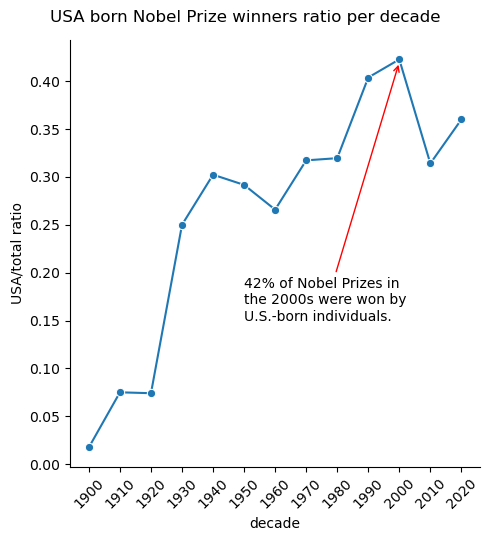

In [10]:
# Show the position of the maximum ratio of US born individuals
g=sns.relplot(x=usa_win_ratios.index,y=usa_win_ratios,kind='line',marker='o')
title='USA born Nobel Prize winners ratio per decade'
g.fig.suptitle(title,y=1.03)
g.set(xlabel='decade',ylabel='USA/total ratio')
plt.xticks(ticks=range(1900,2021,10),rotation=45)
plt.annotate("42% of Nobel Prizes in \nthe 2000s were won by \nU.S.-born individuals.",xy=(2000,0.42),xytext=(1950,.15),arrowprops=dict(arrowstyle='->',color='red'))
plt.show()

### **Decade** and **Nobel Prize category** combination had the highest proportion of female laureates?

* Store this as a dictionary called ``max_female_dict`` where the decade is the key and the category is the value. There should only be one key:value pair.

In [11]:
# Check the genders available
df['sex'].unique()

array(['Male', 'Female', nan], dtype=object)